# **CH07 군집화** (Clustering)


---

# **20230605**

## **01 K-평균 알고리즘 이해**

: **군집 중심점(centroid)** 이라는 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

-  중심점을 중심에 소속된 데이터의 **평균 거리** 중심으로 이동

- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행

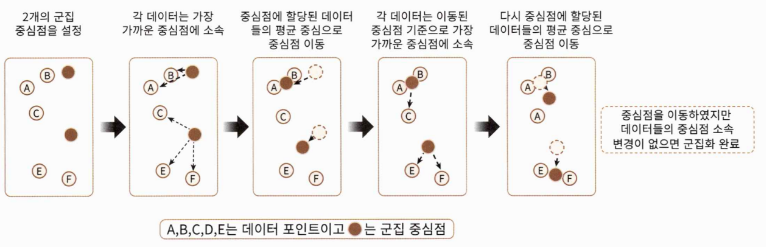

In [12]:
from IPython.display import Image
Image('./ch07_kmeans.png')

#### ㅇ K-평균의 장/단점

- 장점
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결

    <br>

- 단점
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (이를 위해 차원축소를 하기도 함)
    - 반복을 수행하는데, 반복 횟수가 많을 경우 수행시간이 매우 느려짐
    - 몇 개의 군집을 선택해야 할지 가이드하기가 어렵다.

### O sklearn KMeans 클래스 소개

|파라미터명|설명|
|:---------|:---|
| n_cluster | default=8 <br> - 군집화할 개수(군집 중심점의 개수)|
| init | default='k-means++' <br> - 초기에 군집 중심점의 좌표를 설정할 방식, 보통 default 사용 |
| n_init | default=10 |
| max_iter | default=300 <br> - 최대 반복 횟수 (데이터의 중심점 이동이 없으면 종료)|
| tol | default=0.0001 |
| precompute_distances | default='auto' |
| verbose | default=0 |
| random_state | default=None |
| copy_x | default=True | 
| n_jobs | default=1 |
| algorithm | default='auto' |


### O K- 평균을 이용한 붓꽃 데이터 세트 군집화

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters=3
                , init='k-means++'
                , max_iter=300
                ,random_state=0
                )

kmeans.fit(irisDF)

c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
# 진짜 원래 답과 군집화한 것과 비교

irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [6]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)


irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


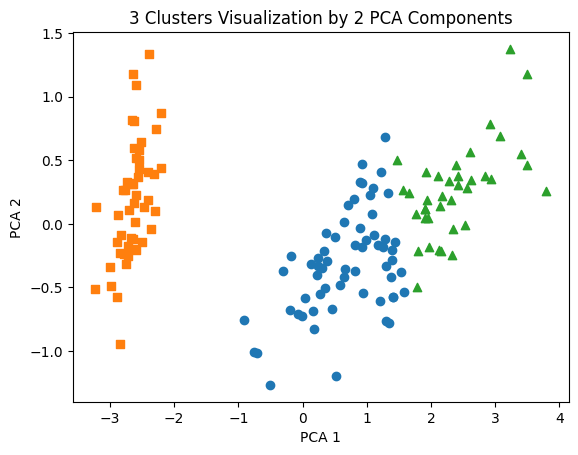

In [7]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index


# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### O 군집화 알고리즘 테스트를 위한 데이터 생성

#### ㅇ make_blobs()

|파라미터명|설명|
|:--------|:---|
| n_samples | default=100 <br> - 생성할 총 데이터의 개수 |
| n_features | - 데이터의 피처 개수 <br> - 시각화를 목표로 할 경우 2개로 설정, 첫번째 피처 x 좌표, 두번째 피처 y 좌표 상 표현 |
| centers | - int -> 군집의 개수 <br> - ndarray -> 개별 군집 중심점의 좌표|
| cluster_std | - 생성될 군집 데이터의 표준 편차 |


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline


X, y = make_blobs(n_samples=200
                  , n_features=2
                  , centers=3
                  , cluster_std= 0.8 # 퍼진 정도
                  , random_state=0
                  )
print(X.shape, y.shape)


# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)


(200, 2) (200,)
[0 1 2] [67 67 66]


In [15]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


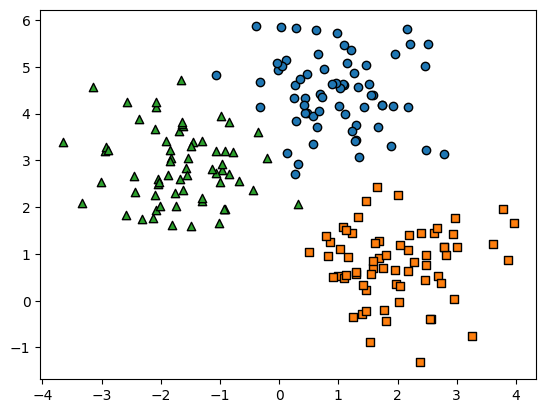

In [19]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target] )


plt.show()

c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


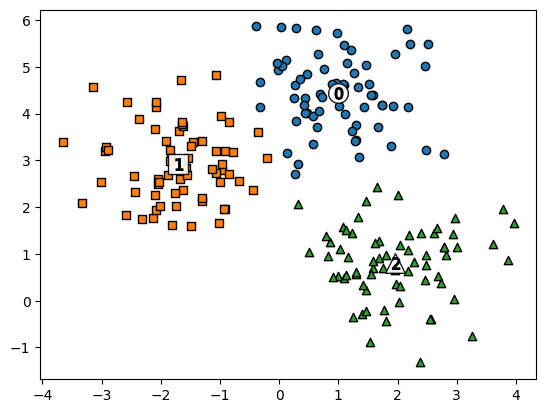

In [20]:

# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels


#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']


# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label] )
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)


plt.show()

In [21]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: count, dtype: int64


In [ ]:
std = [0.4,0.8,1.2,1.6]

## **02 군집 평가(Cluster Evaluation)**

### O **실루엣** 분석의 개요

- 실루엣 분석(silhouette analysis) : 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄

- 실루엣 계수(silhouette coefficient)를 기반으로 함 : 개별 데이터가 가지는 군집화 지표 <br> 
=> 군집별로 나옴



#### ㅇ 실루엣 계수

- i번째 데이터의 포인트 실루엣 계수 s(i)

$$ s(i) = \frac{(b(i)-a(i))}{(max(a(i),b(i)))} $$

#### ㅇ 실루엣 분석의 메서드

+) *kwds : **가변인자**로 파라미터 받음 ex) fuction(1,2,3,...) <br>
+) **kwds : **딕셔너리**로 파라미터 받음 ex) fuction({x : 1, y : 2,...}) <br>
 

- sklearn.metrics.**silhouette_samples**(X, labels, metric='euclidean', **kwds) <br>
: 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 **실루엣 계수**를 계산해 **반환**함


- sklearn.metrics.**silhouette_score**(X, labels, metrics='euclidean', sample_size=None, **kwds) <br>
: 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 **실루엣 계수 값을 평균해 반환함** <br>
$\Rightarrow$ np.mean(silhouette_samples())

#### ㅇ 좋은 군집화의 조건

1. 전체 실루엣 계수의 평균값, 즉 silhouette_score() 값(0~1)이 1에 가까울 수록 좋다.

2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 즉,**개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요** 

---

# **20230607**

### O 붓꽃 데이터 세트를 이용한 군집 평가

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline


iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)


irisDF['cluster'] = kmeans.labels_  # 군집화 결과


# iris 의 모든 개별 데이터에 실루엣 계수값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])    #각각 군집별 점수
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)


# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples


# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))


irisDF.head(3)


silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [2]:
# 군집별 실루엣 계수값

irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### O 군집별 평균 실루엣 계수의 시각화를 통한 **군집 개수 최적화** 방법

In [3]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):
   
    from sklearn.datasets import make_blobs # 임의의데이터 생성, 군집화 예제 데이터 생성
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score


    import matplotlib.pyplot as plt
    import matplotlib.cm as cm  # cm : colormap = palette
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
           
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


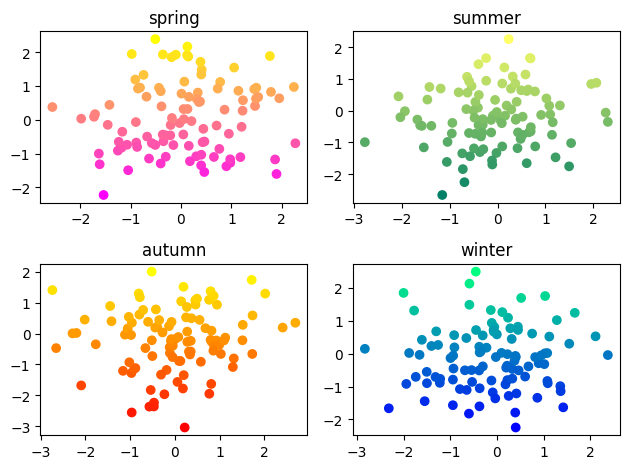

In [8]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)
arr = np.random.standard_normal((8, 100))


plt.subplot(2, 2, 1)
# plt.scatter(arr[0], arr[1], c=arr[1], cmap='spring')
plt.scatter(arr[0], arr[1], c=arr[1])
plt.spring()
plt.title('spring')


plt.subplot(2, 2, 2)
plt.scatter(arr[2], arr[3], c=arr[3])
plt.summer()
plt.title('summer')


plt.subplot(2, 2, 3)
plt.scatter(arr[4], arr[5], c=arr[5])
plt.autumn()
plt.title('autumn')


plt.subplot(2, 2, 4)
plt.scatter(arr[6], arr[7], c=arr[7])
plt.winter()
plt.title('winter')


plt.tight_layout()
plt.show()


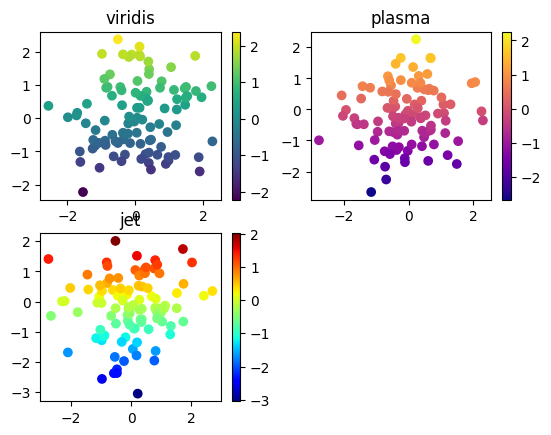

In [6]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)
arr = np.random.standard_normal((8, 100))


plt.subplot(2, 2, 1)
plt.scatter(arr[0], arr[1], c=arr[1])
plt.viridis()
plt.title('viridis')
plt.colorbar()


plt.subplot(2, 2, 2)
plt.scatter(arr[2], arr[3], c=arr[3])
plt.plasma()
plt.title('plasma')
plt.colorbar()


plt.subplot(2, 2, 3)
plt.scatter(arr[4], arr[5], c=arr[5])
plt.jet()
plt.title('jet')
plt.colorbar()

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm


cmaps = plt.colormaps()
for cm in cmaps:
    print(cm)

magma
inferno
plasma
viridis
cividis
twilight
twilight_shifted
turbo
Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c
magma_r
inferno_r
plasma_r
viridis_r
cividis_r
twilight_r
twilight_shifted_r
turbo_r
Blues_r
BrBG_r
BuGn_r
BuPu_r
CMRmap_r
GnBu_r
Greens_r
Greys_r
OrRd_r
Oranges_r
PRGn_r
PiYG_r
PuBu_r
PuBuGn_r
PuOr_r
PuRd_r
Purples_r
RdBu_r
RdGy_r
RdPu_r
RdYlBu_r
RdYlGn_r
Reds_r
Spectral_r
Wistia_r
YlGn_r
YlGnBu_r
YlOrBr_r
YlOrRd_r
afmhot_r
autumn_r
binary_r
bone_r
brg_r
bwr_r
cool_r
coolwarm_r
copper_r
cubehelix_r
flag_r
gist_earth_r
g

c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


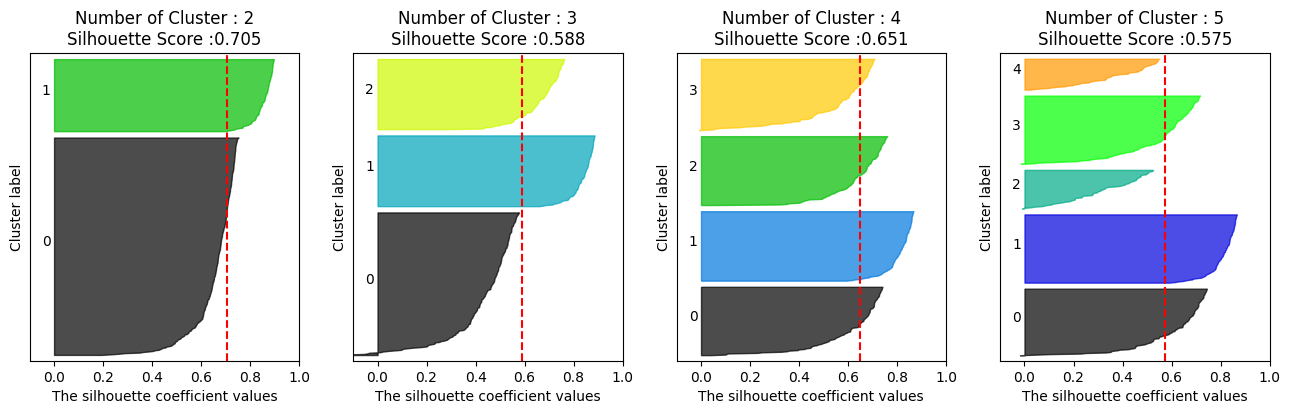

In [9]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  


# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([ 2, 3, 4, 5], X)

c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


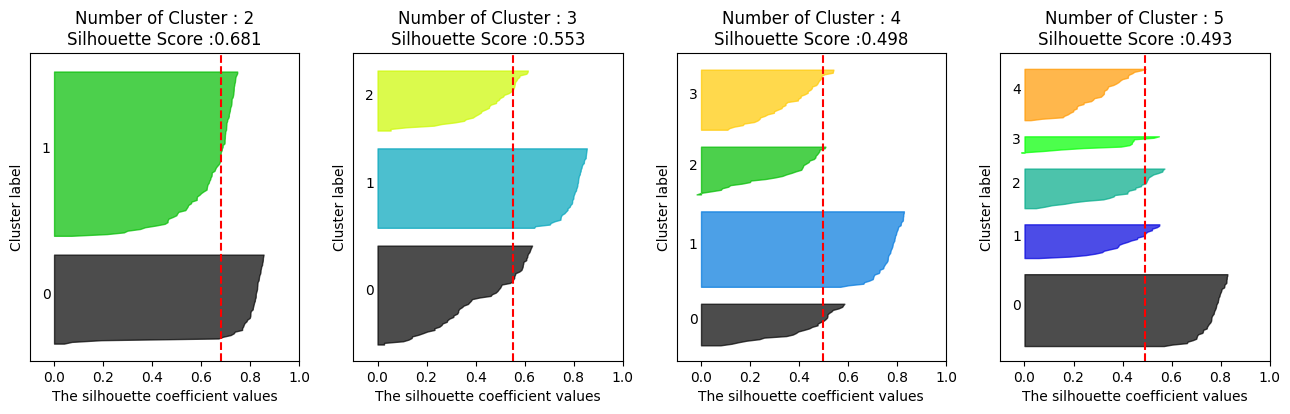

In [10]:
from sklearn.datasets import load_iris


iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)


## **03 평균 이동**

### O 평균 이동(Mean Shift)의 개요

: 중심을 데이터가 모여있는 밀도(**유사성**)가 가장 높은 곳으로 이동시킴

- 평균 이동 군집화 : 데이터의 *분포도*를 이용해 군집 중심점을 찾음 <br>
    -> 군집 중심점은 데이터 포인트(벡터 스페이스 내)가 모여있는 곳 <br>
    => 확률 밀도 함수(PDF:probability density function)를 이용

- 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정, 확률 밀도 함수의 값을 찾기 위해 KDE(Kernel ~~Density~~ Estimation : 커널함수)를 이용 


    - 커널함수 : 벡터의 유사성을 찾는 함수 ex) 가우시안 함수

<br>
<br>

- 평균 이동 군집화는 특정 데이터를 ***반경(radial)*** 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 ***거리값(distance)*** 을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트 하면서 이동하는 방식을 취함 <br>-> 반복 -> **중심점 이동**(중심점의 좌표를 찾음)

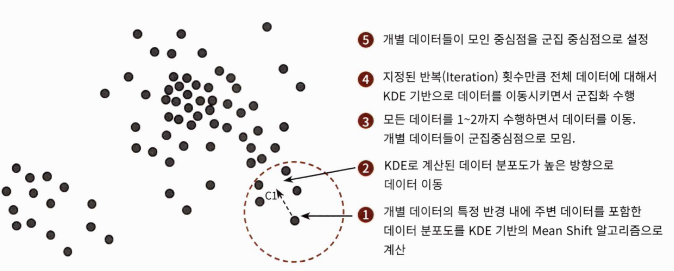

In [13]:
Image('./ch07_meanshift.png')

- 이산 데이터 -> 확률 질량 함수

- 연속 데이터 -> 확률 밀도 함수

    - 확률밀도함수 : $ \mathrm{g(x| \mu,\sigma^2)} = \frac{1}{\sigma \sqrt{2 \pi}} \mathrm{exp}(- \frac{1}{2} * \frac{(x-\mu)^2}{\sigma^2}) $

        - x = 벡터 간의 거리값
        - $ \mathrm{exp} = e^x $

        - $\int_{-\infty}^\infty \mathrm{g(x| \mu,\sigma^2)}\,\mathrm{d}x = 1 $

    - KDE = $ \mathrm{exp}(-\gamma * \frac{\parallel x_1 - x_2 \parallel^2}{\sigma^2}) = \frac{1}{e^{{-\gamma * \parallel{ x_1 - x_2 }\parallel^2}}} $

        - $ \gamma = $ 반경, $\sigma = $ 1

In [14]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift


X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                  cluster_std=0.7, random_state=0)



meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [15]:
from sklearn.cluster import estimate_bandwidth


bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [16]:
import pandas as pd




clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y


# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)


meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))   

cluster labels 유형: [0 1 2]


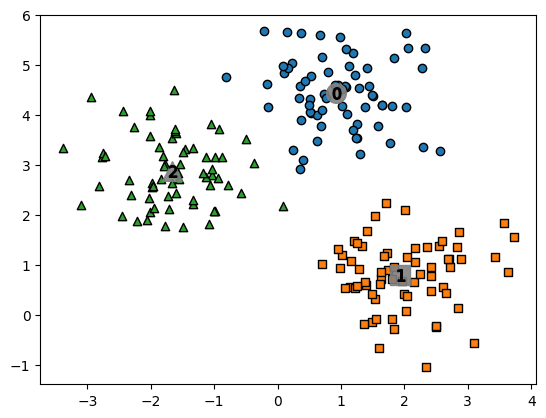

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']


for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
   
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
   
plt.show()


- 장단점

    - 장점 : cluster 개수 지정x

    - 단점 : bandwidth 크기에 아주 민감 -> 세밀한 튜닝 필요

## **04 GMM(Gaussian Mixture Model)**

### O GMM(Gausian Mixture Model) 소개

: 가우시안 혼합 모델


- 분포 기반

- 군집화를 적용하고자 하는 **데이터**가 여러개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식



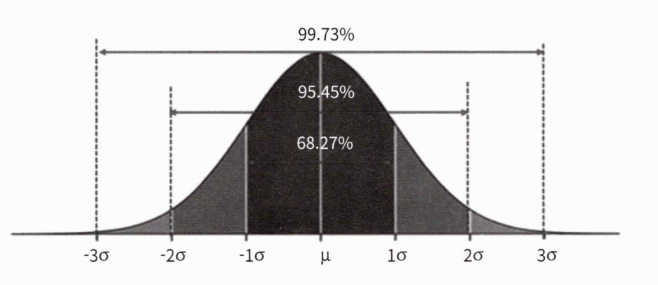

In [20]:
Image('./ch07_표준정규분포.png')

#### ㅇ 정규 분포

- 정규분포는 평균을 중심으로 높은 데이터 분포도를 가지고 있으며, 좌우 표준편차 1에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 95.45%를 가짐

- 평균이 0, 표준편차가 1인 정규분포를 표준 정규 분포라 함

- 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 **`GMM 군집화`** 방식이다. <br>
    
    => 데이터 세트를 구성하는 여러개의 정규분포 곡선을 추출하고 개별 데이터가 이 주 어떤 정규분포에 속하는지 결정하는 방식<br>
    
    => **모수 추정** <br>
        - 개별 정규 분포의 **평균과 분산** 추정<br>
        - 각 데이터가 어떤 정규분포에 **해당되는지의 확률** 추정

#### ㅇ 모수 추정

- GMM은 모수 추정을 위해 EM(Expectation and Maximization) 방법을 적용 <br>
    -> 가우시안 함수 지원

### O GMM을 이용한 붓꽃 데이터 세트 군집화


- K-평균 : 거리기반 -> 군집개수 지정 필요
  
- MeanSift : 거리기반 유사도 확률

- GMM : 확률 기반 -> 군집개수 지정 필요

In [21]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']


# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [22]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)


# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target


# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)


target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: count, dtype: int64


In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: count, dtype: int64


c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### O GMM과 K-평균의 비교

- kmeans 는 원형의 범위에서 군집화를 수행 -> 원형의 범위를 가지는 데이터일 수록 성능 좋음

- visualize_cluster_plot() parameter
    
    - clusterobj : 사이킷런의 군집 수행 객체(fit(),predict()로 군집화 완료한 객체)
    - dataframe : 피처 데이터 세트와 label 값을 가진 Dataframe
    - label_name : 
    - iscenter : 사이킷런 cluster 객체가 군집 중심좌표를 제공하면 True



In [24]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
       
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False


    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
       
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
       
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
   
    plt.legend(loc=legend_loc)
    plt.show()



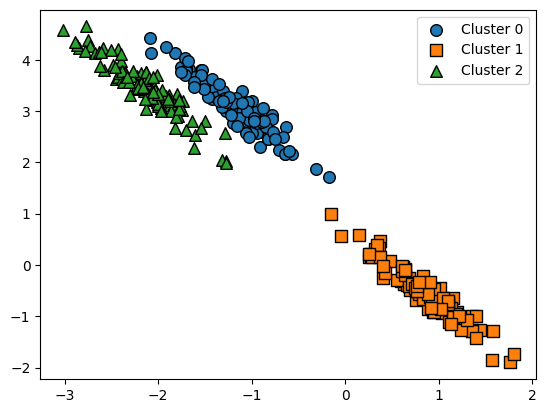

In [25]:
from sklearn.datasets import make_blobs


# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)


# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함.
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


- **선형 변환(행렬 변환)**

내적 = $ \mathrm{np.dot}(X , \begin{bmatrix} x좌표 변환 & xy축 변환 \\ xy축 변환 & y좌표 변환 \end{bmatrix}) $

c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


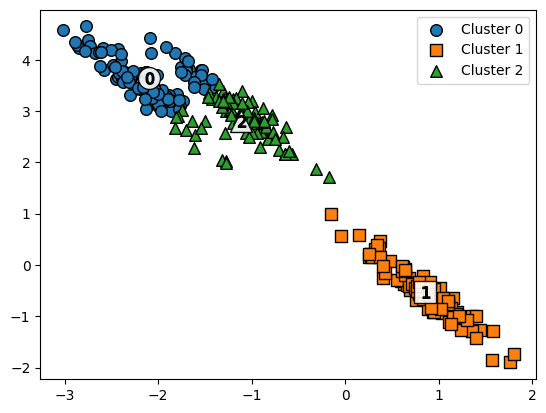

In [26]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label


visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

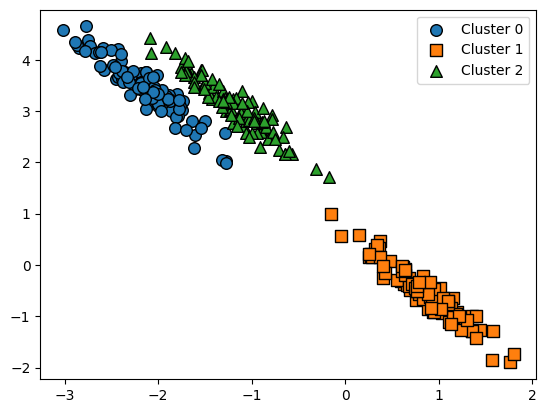

In [27]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label


# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

# GMM은 중심 좌표 없음

In [28]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


## **05 DBSCAN**

### O DBSCAN(Density Based Spatial Clustering of Applications with Noise) 개요

: **밀도 기반** 군집화의 대표적인 알고리즘, 거리도 측정함

- ***Noise : 이상치***

- K평균이동, 평균이동, GMM의 혼합

- 복잡한 데이터세트에도 효과적

- **군집 중심점(centroid) 없음**

#### ㅇ DBSCAN 주요 구성 파라미터

- epsilon(입실론 주변 영역) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역

- min point(최소 데이터 개수) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터 개수

- 데이터 포인트
    
    - Core Point(핵심 포인트)    : 주변 영역내에 최소 데이터 개수 이상의 타 데이터를 가지고 있는 데이터
    - Neighbor Point(이웃 포인트): 주변 영역 내에 위치한 타 데이터
    - Border Point : 주변 영역 내에 최소 데이터 개수 이상의 이숫 포인트를 가지고 잇지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
    - **Noise Point**(잡음 포인트)   : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심포인트도 이웃 포인트로 가지고 있지 않는 데이터 

### O DBSCAN 적용하기 - 붓꽃 데이터 세트

```python
DBSCAN (
        eps : 입실론 주변 영역 반경 
        , min_samples : 핵심포인트가 되기 위해 eps내 포함돼야할 데이터의 최소 개수
        )
```

In [30]:
from sklearn.datasets import load_iris


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']


# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [32]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)


irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target


iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


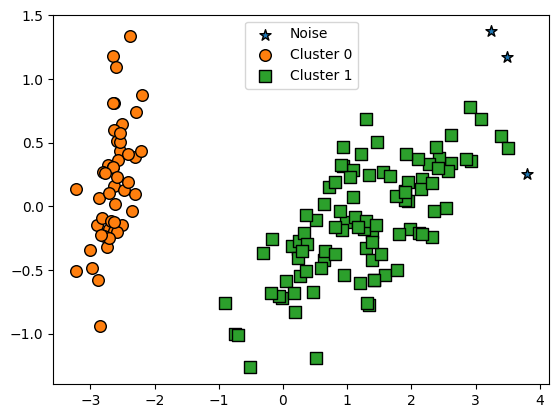

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### O DBSCAN 적용하기 - make_circles() 데이터 세트

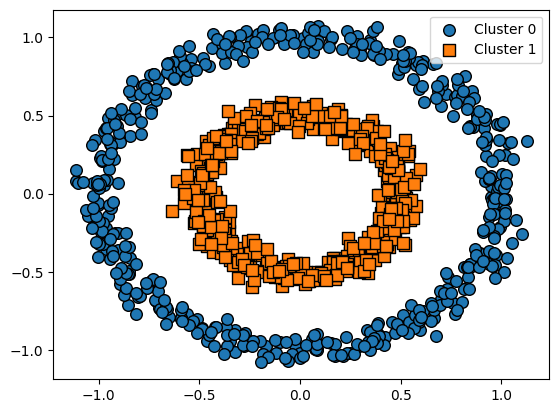

In [35]:
from sklearn.datasets import make_circles


X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y


visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


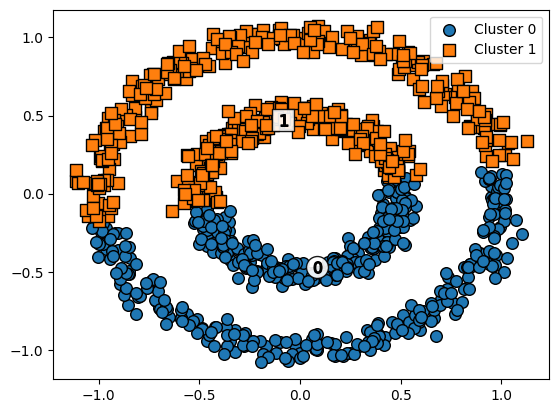

In [36]:
# Kmeans로 make_circles() 데이터 셋 클러스터링 수행
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels


visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True


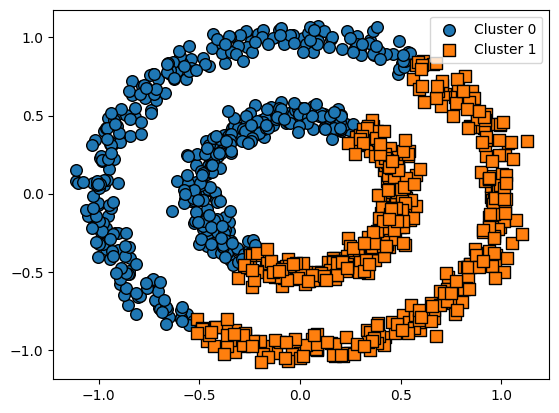

In [37]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label


visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

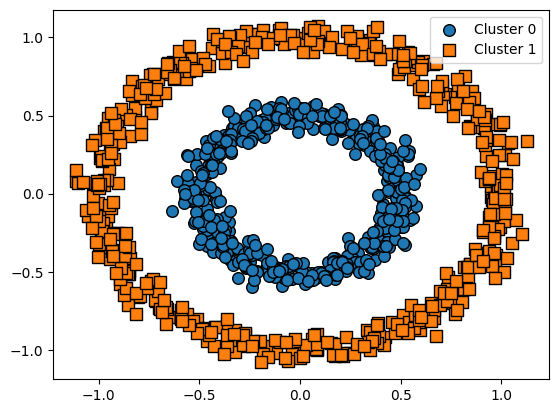

In [38]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels


visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

## **06 군집화 실습 - 고객 세그먼테이션(분류)**